In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('quantmod')
library(quantmod)

In [ ]:
%%R
options("getSymbols.warning4.0"=FALSE)

getSymbols("VTI")
# str(VTI) # We start with an xts
z = as.data.frame(VTI$VTI.Adjusted) #Subsetting VTI.Adjusted
print(head(z))
D2D = function (x) {
    days = nrow(x)
    delta = numeric(days)
    for(i in 2:days){
        delta[i] <- (100*((x[i, 1] - x[i - 1, 1]) / (x[i - 1, 1])))
    }
    delta
}
VTI.InterDay = D2D(z)
VTI.InterDay[1] <- mean(VTI.InterDay)#Something to fill in the 0 in row 1.
vti = merge(VTI,VTI.InterDay)

mov <- vti$VTI.InterDay

           VTI.Adjusted
2007-01-03     52.50474
2007-01-04     52.60977
2007-01-05     52.19333
2007-01-08     52.38469
2007-01-09     52.38469
2007-01-10     52.50099


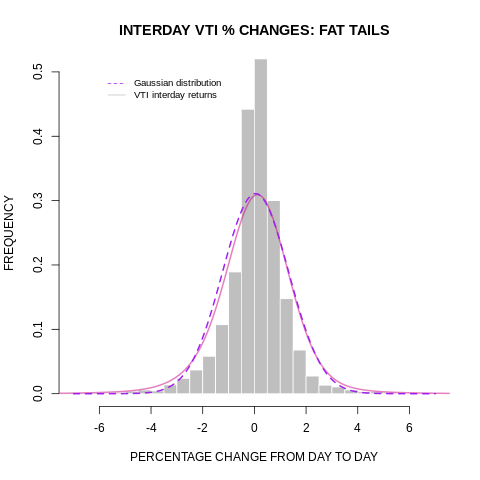

In [ ]:
%%R
hist(mov,main="INTERDAY VTI % CHANGES: FAT TAILS", border=F,
     xlab = "PERCENTAGE CHANGE FROM DAY TO DAY",
     ylab = "FREQUENCY",prob = TRUE, xlim=c(-7,7), ylim=c(0,0.50),
     breaks=50, col=rgb(.5,.5,.5,0.5))

#Add density estimate
lines(density(mov,adjust=7),col=rgb(.8,.0,.5,0.5),lwd=2) #Prettier, adjusted pdf estimate
sd = sd(mov)
m = mean(mov)
curve(dnorm(x,mean=m,sd=sd),col="purple",lwd=2,lty=2,add=T,yaxt="n")
legend(-6, 0.5, legend=c("Gaussian distribution", "VTI interday returns"), bty='n',
       col=c("purple", col=rgb(.5,.5,.5,0.5)), lty=c(2,1), cex=0.8)

In [ ]:
%%R
# Worst and best days in the market
print(time(mov[mov==min(mov)]))
print(time(mov[mov==max(mov)]))

[1] "2020-03-16"
[1] "2008-10-13"


![](https://user-images.githubusercontent.com/9312897/153725686-6545eddf-548b-4ca0-8942-324618afbd03.png)

In [ ]:
%%R
# Worst days in the market
mov[head(order(mov))]

           VTI.InterDay
2008-10-15    -9.352936
2008-12-01    -8.939092
2011-08-08    -6.929576
2020-03-09    -8.028420
2020-03-12    -9.723929
2020-03-16   -11.380857


In [ ]:
%%R
# Best days in the market
mov[mov==min(mov)]
mov[head(order(mov, decreasing=T))]

           VTI.InterDay
2008-10-13    12.829773
2008-10-28    10.038238
2009-03-23     6.945876
2020-03-13     9.101848
2020-03-24     9.489762
2020-04-06     6.994664


In [ ]:
%%R
star <- row(mov)[mov==max(mov)]
mov[(star-3):(star+3),]

           VTI.InterDay
2008-10-08   -1.9122629
2008-10-09   -6.2795032
2008-10-10   -2.8902979
2008-10-13   12.8297730
2008-10-14   -0.8593118
2008-10-15   -9.3529359
2008-10-16    4.6030734


In [ ]:
%%R
print(format(as.Date("2008-10-10"), '%A'))
format(as.Date(time(mov[mov==max(mov)])), '%A')

[1] "Friday"
[1] "Monday"


![](https://user-images.githubusercontent.com/9312897/153689428-b5e7ebf6-a2cf-4367-8ca9-973c46e6a680.png)

![](https://user-images.githubusercontent.com/9312897/153725477-c06f8598-e5ab-4f0a-b469-b90b2109e788.png)

In [ ]:
%%R
# Number of days this year with a loss of more than n percentage:
n <- 2
sum(mov["2022"] < - n)

[1] 2


In [ ]:
%%R
# Number of days in the period specified with a loss of more than n percentage:
n <- 4
sum(mov["2020/2022"] < - n)

[1] 9


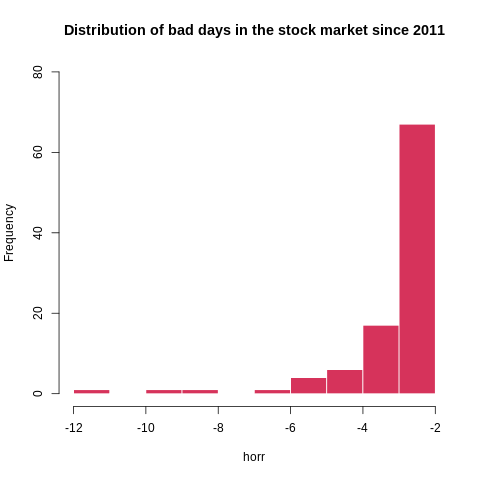

In [ ]:
%%R
horr <- mov["2011/2022"][mov["2011/2022"] < - 2]
hist(horr, col=rgb(.8,0,.2,.8), border=F, main="Distribution of bad days in the stock market since 2011", ylim=c(0,80))

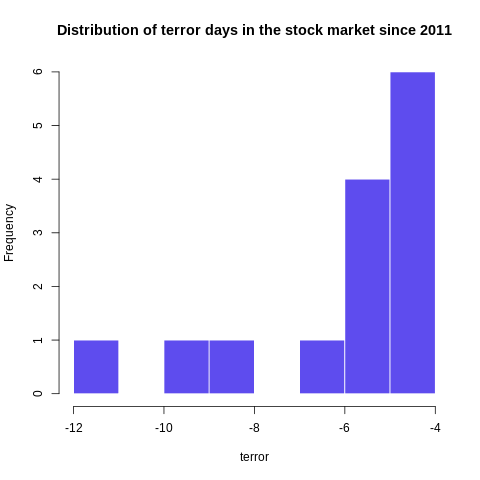

In [ ]:
%%R
terror <- mov["2011/2022"][mov["2011/2022"] < - 4]
hist(terror, col=rgb(.1,0,.9,.7),
     main="Distribution of terror days in the stock market since 2011",
     border=F, breaks=8)

In [ ]:
%%R
# Which was the worst day in the market since 2011?
horr[horr < -11]

           VTI.InterDay
2020-03-16    -11.38086


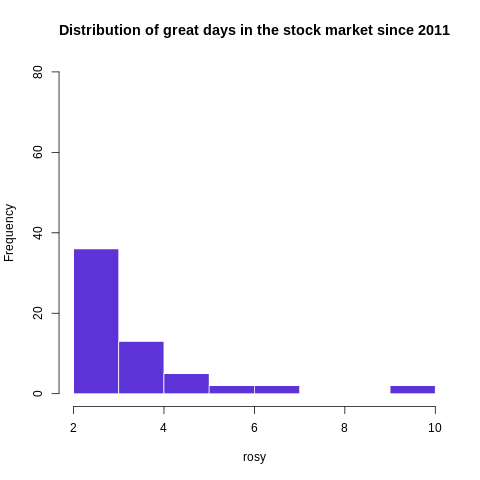

In [ ]:
%%R
rosy <- mov["2011/2022"][mov["2011/2022"] > 2]
hist(rosy, col=rgb(.2,0,.8,.8), border=F, main="Distribution of great days in the stock market since 2011", ylim=c(0,80))

           VTI.InterDay
2011-08-09     5.004379
2011-08-11     4.578588
2011-11-30     4.231758
2018-12-26     4.812018
2020-03-02     4.141195
2020-03-10     4.960283
2020-03-13     9.101848
2020-03-17     5.014122
2020-03-24     9.489762
2020-03-26     6.070900
2020-04-06     6.994664


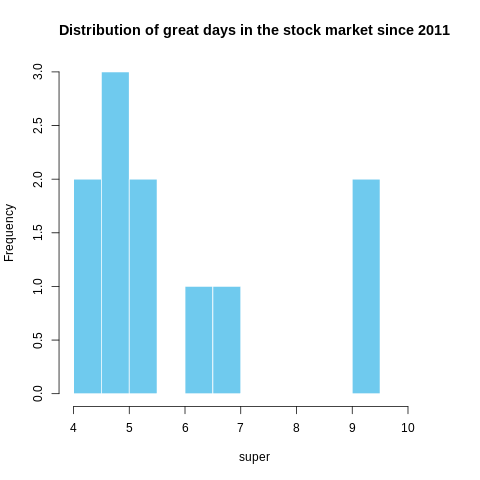

In [ ]:
%%R
n <- 4
super <- mov["2011/2022"][mov["2011/2022"] > n]
hist(super, col=rgb(.2,.7,.9,.7), border=F, main="Distribution of great days in the stock market since 2011",
     xlim=c(n,max(super)+1), breaks=8, frequency=F)
print(super)

In [ ]:
%%R
summary(mov)

     Index             VTI.InterDay      
 Min.   :2007-01-03   Min.   :-11.38086  
 1st Qu.:2010-10-12   1st Qu.: -0.40851  
 Median :2014-07-24   Median :  0.08220  
 Mean   :2014-07-24   Mean   :  0.04625  
 3rd Qu.:2018-05-03   3rd Qu.:  0.60606  
 Max.   :2022-02-11   Max.   : 12.82977  


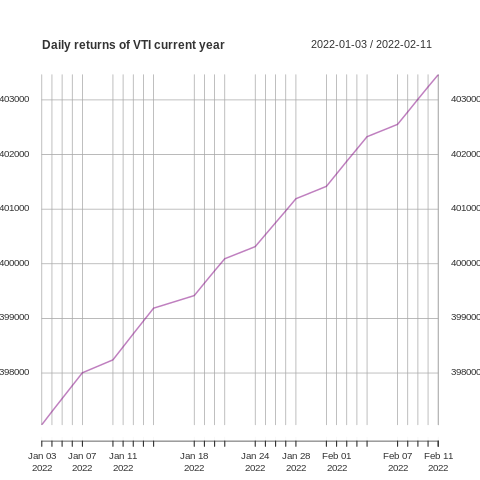

In [ ]:
%%R
c <- cumsum(VTI$VTI.Close)
plot(c["2022"], main='Daily returns of VTI current year', lwd=2, col=rgb(0.5,0,0.5,0.5))

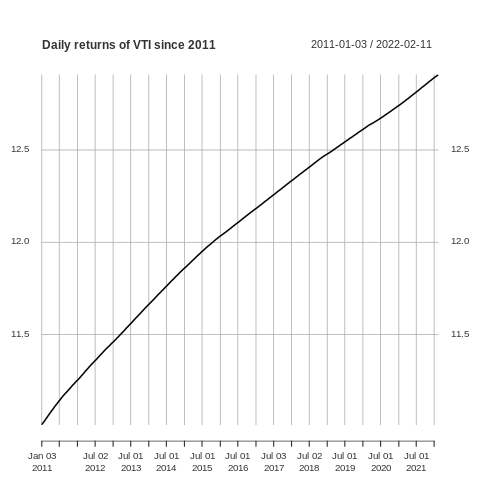

In [ ]:
%%R
l <- c(log(c))
plot(l["2011/2022"], main='Daily returns of VTI since 2011')

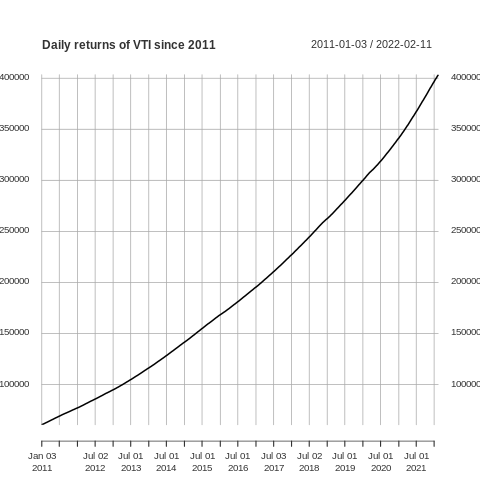

In [ ]:
%%R
plot(c["2011/2022"], main='Daily returns of VTI since 2011')

In [ ]:
# !jupyter nbconvert to html VTI_Stock_Market_Returns.ipynb

[NbConvertApp] WARNING | pattern u'to' matched no files
[NbConvertApp] WARNING | pattern u'html' matched no files
[NbConvertApp] WARNING | pattern u'VTI_Stock_Market_Returns.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
